In [1]:
import scanpy as sc
import pandas as pd
import os
import numpy as np

In [2]:
# import os, sys
# os.environ['R_HOME'] = sys.exec_prefix+"/lib/R/" # to avoid crashes due to rpy2 not finding the R install on conda
# import scFates as scf

In [5]:
os.chdir('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/')

In [7]:
adata_path='/hpcscratch/ieo/DIMA/scmultiome_mpi/scmultiome_norm_ATACassay.h5ad'
#adata_path='scmultiome_ATACassay.h5ad'
adata=sc.read_h5ad(adata_path)
adata

AnnData object with n_obs × n_vars = 22358 × 35509
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'pANN_0.25_0.09_556', 'doublets', 'dataset', 'pANN_0.25_0.09_978', 'pANN_0.25_0.09_143', 'pANN_0.25_0.09_477', 'pANN_0.25_0.09_359', 'pANN_0.25_0.09_20', 'pANN_0.25_0.09_136', 'pANN_0.25_0.09_70', 'pANN_0.25_0.09_1488', 'pANN_0.25_0.09_1159', 'pANN_0.25_0.09_399', 'pANN_0.25_0.09_832', 'sample', 'stage', 'replicate', 'nCount_ATAC', 'nFeature_ATAC', 'integrated_snn_res.0.8', 'annotation_leiden12', 'ident'
    uns: 'X_name'
    obsm: 'LSI', 'UMAP'
    layers: 'logcounts'

In [6]:
germlayer_markergenes=pd.read_csv('/hpcscratch/ieo/DIMA/scmultiome_mpi/germlayer_markergenes.csv',
                                  index_col=[3]).drop(['Unnamed: 0','index'],1).to_dict()
#germlayer_markergenes['germlayer']

/var/tmp/pbs.1977579.hpcfe01/ipykernel_12470/3590274722.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  germlayer_markergenes=pd.read_csv('/hpcscratch/ieo/DIMA/scmultiome_mpi/germlayer_markergenes.csv',


In [8]:
germlayer_markergenes2=pd.read_csv('/hpcscratch/ieo/DIMA/scmultiome_mpi/germlayer_markergenes.csv').drop(['Unnamed: 0','index'],1)
#germlayer_markergenes2.groupby('germlayer').apply(list)

/var/tmp/pbs.1977579.hpcfe01/ipykernel_12470/3760478266.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  germlayer_markergenes2=pd.read_csv('/hpcscratch/ieo/DIMA/scmultiome_mpi/germlayer_markergenes.csv').drop(['Unnamed: 0','index'],1)


In [9]:
markergenes=germlayer_markergenes2.groupby('germlayer')['gene'].apply(list).to_dict()

In [10]:
adata.var['chr']=[e.split('-')[0] for e in adata.var.index.tolist()]
adata.var['start']=[e.split('-')[-2] for e in adata.var.index.tolist()]
adata.var['end']=[e.split('-')[-1] for e in adata.var.index.tolist()]

In [11]:
adata.var

chr  start    end
chr2L-5307-6202               chr2L   5307   6202
chr2L-7443-8356               chr2L   7443   8356
chr2L-8534-9507               chr2L   8534   9507
chr2L-12112-13006             chr2L  12112  13006
chr2L-14589-15494             chr2L  14589  15494
...                             ...    ...    ...
chrUn-CP007120v1-51957-52450  chrUn  51957  52450
chrUn-CP007120v1-52895-53877  chrUn  52895  53877
chrUn-CP007120v1-71423-72357  chrUn  71423  72357
chrUn-CP007120v1-73216-74134  chrUn  73216  74134
chrUn-CP007120v1-74658-75517  chrUn  74658  75517

[35509 rows x 3 columns]

## peaks associated to marker genes

In [12]:
peaksgenes=pd.read_csv("/hpcnfs/scratch/DIMA/piva/mpi_freiburg/atac_peaks_associated_to_markergenes_20kb.bed", 
                       sep='\t', header=None)                

peaksgenes.rename(columns={0:'seqnames', 1:'start', 2:'end', 3:'gene'}, inplace=True)
peaksgenes['start']=peaksgenes['start']+1
peaksgenes['peak']=peaksgenes['seqnames'].astype(str)+'-'+peaksgenes['start'].astype(str)+'-' +peaksgenes['end'].astype(str)

peaksgenes.head()


seqnames   start     end gene  4  5                 peak
0    chr2L  457635  458494  ush  0  .  chr2L-457635-458494
1    chr2L  466417  467074  ush  0  .  chr2L-466417-467074
2    chr2L  467459  468372  ush  0  .  chr2L-467459-468372
3    chr2L  470594  471625  ush  0  .  chr2L-470594-471625
4    chr2L  471763  472543  ush  0  .  chr2L-471763-472543

In [13]:
peaksgenes[peaksgenes['gene']=='Lim1']

seqnames    start      end  gene  4  5                  peak
789     chrX  8785448  8786385  Lim1  0  .  chrX-8785448-8786385
790     chrX  8788777  8789719  Lim1  0  .  chrX-8788777-8789719
791     chrX  8799658  8800611  Lim1  0  .  chrX-8799658-8800611
792     chrX  8801330  8801996  Lim1  0  .  chrX-8801330-8801996
793     chrX  8805436  8806336  Lim1  0  .  chrX-8805436-8806336
794     chrX  8806494  8807208  Lim1  0  .  chrX-8806494-8807208
795     chrX  8810315  8811278  Lim1  0  .  chrX-8810315-8811278
796     chrX  8817589  8818498  Lim1  0  .  chrX-8817589-8818498
797     chrX  8821802  8822702  Lim1  0  .  chrX-8821802-8822702

In [14]:
import numpy as np
#adata.obsm["X_umap"]=np.array(adata.obsm['WNN.UMAP'])

In [15]:
#sc.pl.umap(adata,color=adata.var.index[0:3] )

In [16]:
len([e for e in peaksgenes['peak'].tolist() if e in adata.var_names])

861

In [17]:
peaksgenes.set_index('peak',inplace=True)
#peaksgenes['gene'].to_dict()

In [18]:
adata.var['gene']=adata.var.index.map(peaksgenes['gene'].to_dict())

In [19]:
#sc.pl.umap(adata,color=adata.var[adata.var['gene']=='Ptx1'].index, size=7 )

In [20]:
adata.var['germlayer_marker']=adata.var['gene'].map(germlayer_markergenes['germlayer'])

In [21]:
adatawt=adata[adata.obs['sample']=='wt'].copy()

In [22]:
peaksgenes

seqnames     start       end gene  4  5
peak                                                          
chr2L-457635-458494       chr2L    457635    458494  ush  0  .
chr2L-466417-467074       chr2L    466417    467074  ush  0  .
chr2L-467459-468372       chr2L    467459    468372  ush  0  .
chr2L-470594-471625       chr2L    470594    471625  ush  0  .
chr2L-471763-472543       chr2L    471763    472543  ush  0  .
...                         ...       ...       ...  ... .. ..
chrX-18646958-18647872     chrX  18646958  18647872  wgn  0  .
chrX-18648015-18648828     chrX  18648015  18648828  wgn  0  .
chrX-18649948-18650858     chrX  18649948  18650858  wgn  0  .
chrX-18652555-18653481     chrX  18652555  18653481  wgn  0  .
chrX-18654012-18654928     chrX  18654012  18654928  wgn  0  .

[861 rows x 6 columns]

In [23]:
adatawt=adatawt[ :,peaksgenes.index]

In [24]:
adatawt.var

chr     start       end gene  \
chr2L-457635-458494     chr2L    457635    458494  ush   
chr2L-466417-467074     chr2L    466417    467074  ush   
chr2L-467459-468372     chr2L    467459    468372  ush   
chr2L-470594-471625     chr2L    470594    471625  ush   
chr2L-471763-472543     chr2L    471763    472543  ush   
...                       ...       ...       ...  ...   
chrX-18646958-18647872   chrX  18646958  18647872  wgn   
chrX-18648015-18648828   chrX  18648015  18648828  wgn   
chrX-18649948-18650858   chrX  18649948  18650858  wgn   
chrX-18652555-18653481   chrX  18652555  18653481  wgn   
chrX-18654012-18654928   chrX  18654012  18654928  wgn   

                               germlayer_marker  
chr2L-457635-458494     Dorsal ectoderm markers  
chr2L-466417-467074     Dorsal ectoderm markers  
chr2L-467459-468372     Dorsal ectoderm markers  
chr2L-470594-471625     Dorsal ectoderm markers  
chr2L-471763-472543     Dorsal ectoderm markers  
...                                         ...  
chrX-18646958-18647872         Mesoderm markers  
chrX-18648015-18648828         Mesoderm markers  
chrX-18649948-18650858         Mesoderm markers  
chrX-18652555-18653481         Mesoderm markers  
chrX-18654012-18654928         Mesoderm markers  

[861 rows x 5 columns]

In [25]:
genemean=adatawt.var

In [26]:
adatawt.var['gene'].unique()

array(['ush', 'slp1', 'rau', 'SoxN', 'numb', 'salm', 'bun', 'Ance', 'sna',
       'beat-IIIc', 'Ptr', 'egr', 'fra', 'GEFmeso', 'rib', 'hbn', 'twi',
       'ken', 'lov', 'Blimp-1', 'ltl', 'Doc3', 'Doc2', 'Doc1', 'byn',
       'bbg', 'aos', 'geko', 'croc', 'Mes2', 'hb', 'mfas', 'stumps',
       'Abd-B', 'cnc', 'jigr1', 'fkh', 'zfh1', 'tll', 'Ptx1', 'l(1)sc',
       'vnd', 'CG2930', 'peb', 'brk', 'Corp', 'Lim1', 'sisA', 'NetA',
       'sog', 'disco', 'wgn'], dtype=object)

In [27]:

res = pd.DataFrame(index=adatawt.var['gene'].unique(), columns=adatawt.obs_names)                                                                                                 

for g in adatawt.var['gene'].unique(): 
    print(g)
    res.loc[g] = adatawt[:,adatawt.var['gene'].isin([g])].X.mean(1).T

ush
slp1
rau
SoxN
numb
salm
bun
Ance
sna
beat-IIIc
Ptr
egr
fra
GEFmeso
rib
hbn
twi
ken
lov
Blimp-1
ltl
Doc3
Doc2
Doc1
byn
bbg
aos
geko
croc
Mes2
hb
mfas
stumps
Abd-B
cnc
jigr1
fkh
zfh1
tll
Ptx1
l(1)sc
vnd
CG2930
peb
brk
Corp
Lim1
sisA
NetA
sog
disco
wgn


In [28]:
import anndata
adatawt_mean= anndata.AnnData(X= res.T,
                        obs=adatawt.obs,
                        var= pd.DataFrame(index=res.index))

In [29]:
adatawt_mean

AnnData object with n_obs × n_vars = 13931 × 52
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'pANN_0.25_0.09_556', 'doublets', 'dataset', 'pANN_0.25_0.09_978', 'pANN_0.25_0.09_143', 'pANN_0.25_0.09_477', 'pANN_0.25_0.09_359', 'pANN_0.25_0.09_20', 'pANN_0.25_0.09_136', 'pANN_0.25_0.09_70', 'pANN_0.25_0.09_1488', 'pANN_0.25_0.09_1159', 'pANN_0.25_0.09_399', 'pANN_0.25_0.09_832', 'sample', 'stage', 'replicate', 'nCount_ATAC', 'nFeature_ATAC', 'integrated_snn_res.0.8', 'annotation_leiden12', 'ident'

In [30]:
import seaborn as sns
import matplotlib
cmap_greyred = matplotlib.colors.LinearSegmentedColormap.from_list("", list(sns.color_palette('Greys',7))[0:4]+['#d62728'])# list(sns.color_palette('Reds',5))[-2:] )   # ['#d62728']) # ["#EAEAEA","#EAEAEA",'#d62728']) # 'red'
#cmap_greyred=shiftedColorMap(cmap_greyred, start=0, midpoint=0.7, stop=1.0, name='greyre')

In [31]:
adatawt_mean

AnnData object with n_obs × n_vars = 13931 × 52
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'pANN_0.25_0.09_556', 'doublets', 'dataset', 'pANN_0.25_0.09_978', 'pANN_0.25_0.09_143', 'pANN_0.25_0.09_477', 'pANN_0.25_0.09_359', 'pANN_0.25_0.09_20', 'pANN_0.25_0.09_136', 'pANN_0.25_0.09_70', 'pANN_0.25_0.09_1488', 'pANN_0.25_0.09_1159', 'pANN_0.25_0.09_399', 'pANN_0.25_0.09_832', 'sample', 'stage', 'replicate', 'nCount_ATAC', 'nFeature_ATAC', 'integrated_snn_res.0.8', 'annotation_leiden12', 'ident'

In [32]:
sc.pp.pca(adatawt_mean)

In [33]:
sc.pp.neighbors(adatawt_mean, n_pcs=15)
sc.tl.umap(adatawt_mean)

/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packag

In [34]:
sc.tl.leiden(adatawt_mean, key_added='leiden_res05', resolution=0.5)

In [36]:
adatawt_mean.var['germlorder_germayer_markers']=adatawt_mean.var.index.map(germlayer_markergenes['germlayer'])

In [37]:
order_germ=['mesoderm',
 'anterioposterior_ectoderm',
 'dorsal_ectoderm',
 'neuroectoderm',
 'ventral_ectoderm',
 'anterior_endoderm',
 'posterior_endoderm','yolk',
 'undifferentiated_cells']

In [38]:
pwd

'/hpcnfs/scratch/DIMA/piva/mpi_freiburg'

In [39]:
# to chenge keys order 
markergenes2={}
for k in ['Mesoderm markers','Anterioposterior ectoderm', 'Dorsal ectoderm markers', 'Neuroectoderm markers', 'Ventral Ectoderm Markers', 'Anterior endoderm markers', 
 'Posterior endoderm markers',  'Yolk cells']:
    markergenes2[k]=markergenes[k]
    

In [40]:
for k,v in markergenes2.items():
    markergenes2[k]=sorted(v)

In [50]:
cmap_greygreen = matplotlib.colors.LinearSegmentedColormap.from_list("", 
                                        list(sns.color_palette('Greys',16))[0:5]+[ '#2bb54e']) 
#+list(sns.color_palette('Greens',5))[2:4])
 
# list(sns.color_palette('Reds',5))[-2:] )   # ['#d62728']) # ["#EAEAEA","#EAEAEA",'#d62728']) # 'red'

/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


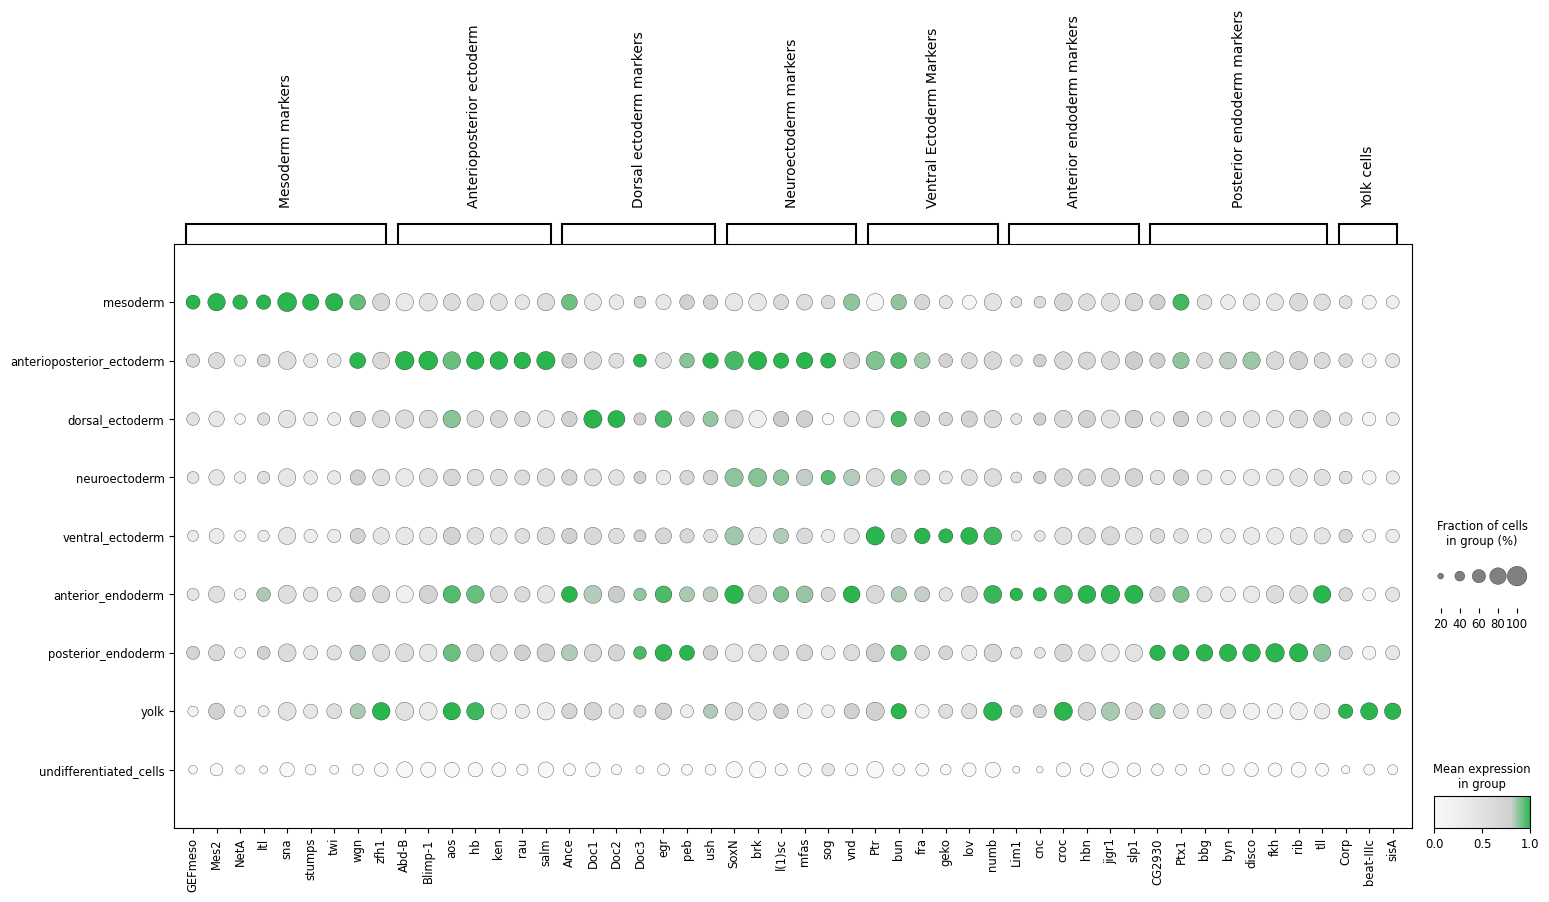

In [53]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,1,figsize=(35/2,20/2))
sc.pl.dotplot(adatawt_mean,#dendrogram=True,
            var_names=markergenes2, groupby='annotation_leiden12',
              cmap=cmap_greygreen, standard_scale='var', #title='WT ATAC', 
                 categories_order=order_germ, ax=axs, 
             # save='WT_ATAC_mean_markergenes_20kb.pdf'
                )
fig.savefig('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/figures/figure_dicembre23/WT_ATAC_mean_markergenes_20kb.pdf')

In [49]:
coord_per_umap=pd.read_csv('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/coordinates_markergenes.csv', sep=';').drop('Unnamed: 2',1)
coord_per_umap['germlayer']=coord_per_umap['gene'].map(germlayer_markergenes['germlayer'])

/var/tmp/pbs.1692551.hpcfe01/ipykernel_1190/866578629.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  coord_per_umap=pd.read_csv('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/coordinates_markergenes.csv', sep=';').drop('Unnamed: 2',1)


In [51]:
coord_per_umap['coordinates']=[e.replace(':','-') for e in coord_per_umap['coordinates']]

In [55]:
len(coord_per_umap['coordinates'])

51

In [57]:
common=[e for e in coord_per_umap['coordinates'] if e in adatawt.var_names]

In [58]:
coord_per_umap[coord_per_umap['coordinates'].isin(common)]

gene              coordinates                   germlayer
27     l(1)sc       chrX-402097-402933       Neuroectoderm markers
28        Ptr    chr2R-6192589-6193203    Ventral Ectoderm Markers
29        lov  chr2R-25099187-25100078    Ventral Ectoderm Markers
30       numb    chr2L-9432618-9433457    Ventral Ectoderm Markers
31        fra  chr2R-12532781-12533715    Ventral Ectoderm Markers
32       geko  chr3L-18134634-18135611    Ventral Ectoderm Markers
33        bun  chr2L-12512297-12513192    Ventral Ectoderm Markers
34        cnc  chr3R-23210395-23212344   Anterior endoderm markers
35        hbn  chr2R-20962200-20963006   Anterior endoderm markers
36       slp1    chr2L-3828852-3829992   Anterior endoderm markers
37       Lim1     chrX-8776337-8777357   Anterior endoderm markers
38       croc  chr3L-21481549-21482461   Anterior endoderm markers
39      jigr1  chr3R-25643187-25644203   Anterior endoderm markers
40        fkh  chr3R-28588269-28589339  Posterior endoderm markers
41     CG2930     chrX-3868698-3869806  Posterior endoderm markers
42        rib  chr2R-19265875-19266735  Posterior endoderm markers
43        bbg  chr3L-14454408-14455436  Posterior endoderm markers
44      disco   chrX-16221989-16222900  Posterior endoderm markers
45        tll  chr3R-30849341-30850265  Posterior endoderm markers
46       Ptx1  chr3R-30905172-30906152  Posterior endoderm markers
47        byn  chr3L-11925032-11925998  Posterior endoderm markers
48       sisA   chrX-11322068-11323193                  Yolk cells
49       Corp     chrX-8275009-8275728                  Yolk cells
50  beat-IIIc  chr2L-17262047-17264009                  Yolk cells

In [60]:
coord_per_umap.set_index('coordinates', inplace=True)

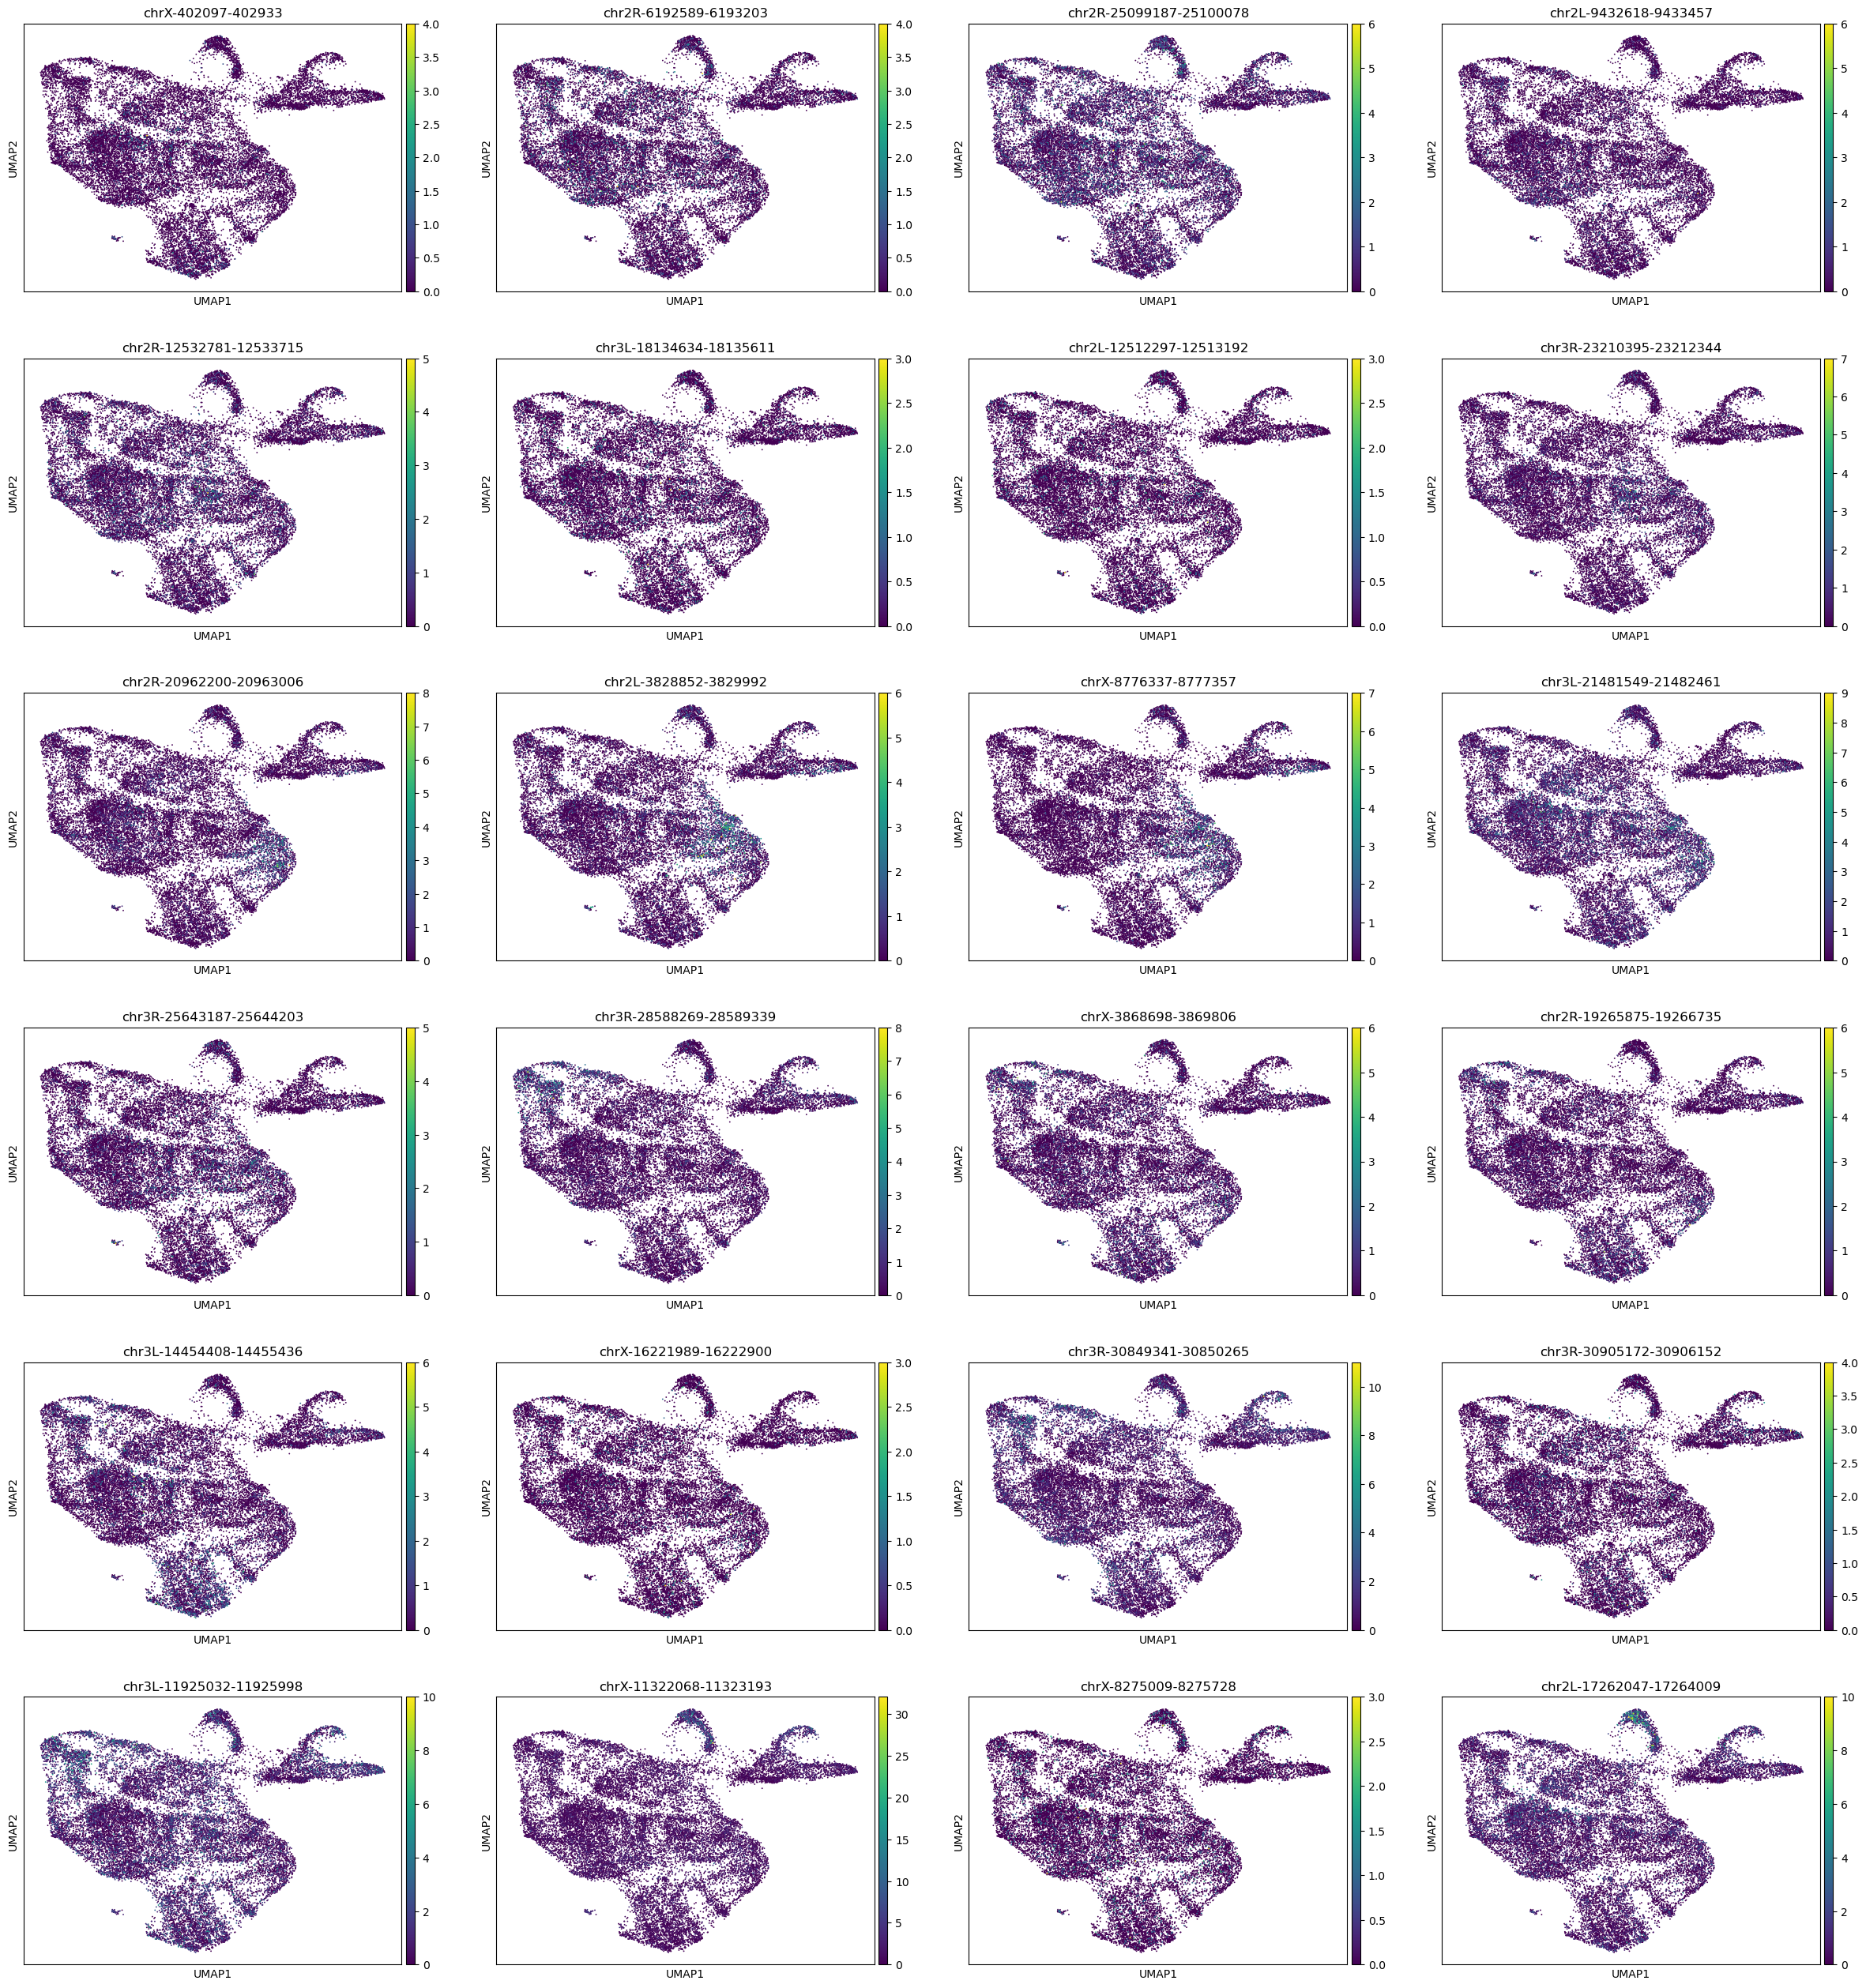

In [59]:
sc.pl.umap(adata,color=common, size=7,)# title='%s - %s'%(gene, peak)